# Hackathon 1, statistics.

This project illustrates the course LEPL1109. You will study the emission of PM2.5 fine particles in Shanghai and Beijing, measured by US embassy/offices. PM2.5 refers to atmospheric particulate matter (PM) that have a diameter less than 2.5 micrometers. In other words, it's used as a measure of pollution. 


## Report content

•	Grades are granted to the members whose names are in the Jupyter notebook. If your name doesn’t appear on the top of the notebook, you’ll get a 0, even though you are in a group on Moodle.

•	The jupyter notebook must be compiled with printed results and next submitted via moodle. The absence of compiled results (or non-printed values) leads to a lower grade.

•	Do not comment your results directly into cells of code. Use instead a Markdown cell. 

•	"Dry" code or results not followed by a minimum of analysis / comments will be penalized.


## Report submission

•	Deadline, see moodle website. Submission after the deadline will not be accepted.

•	To submit your report, go to the section “Hackathons” on Moodle and the subsection “Remise Hackathon 1”. You can upload your work there. Once you are sure that it is your final version, click the button “Envoyer le devoir”. It is important that you don’t forget to click on this button ! 

•	Reports that have not been uploaded through Moodle will not be corrected.


## Names and Noma of participants:

Part. 1: Jonathan Bien 4374-22-00

Part. 2: Romain Bellens 3064-21-00

Part. 3: Ismaël Zaoudi 6055-22-00

Part. 4: Lionel Peduzzi 6969-22-00

Part. 5: Bence Bognar 3239-22-00

Part. 6: Louis Jacques 9080-22-00


# Air quality in China


PM2.5 consists of airborne particles with aerodynamic diameters less than 2.5 μm. They are known to adversely affect human
health. The U.S. Embassy in Beijing started releasing hourly PM2.5 readings in April 2008, followed by the consulates in Guangzhou, Shanghai, Chengdu, and Shenyang in November and December 2011, June 2012, and April 2013, respectively. China’s Ministry of Environmental Protection (MEP) began to report hourly PM2.5 data in 74 cities (which include the five cities with the U.S. diplomatic posts) from January 2013, which was extended to 338 cities in January 2015.

The time period for this data is between Jan 1st, 2010 to Dec 31st, 2015. Missing data are denoted as NA.

* No: row number
* year: year of data in this row
* month: month of data in this row
* day: day of data in this row
* hour: hour of data in this row
* season: season of data in this row
* PM: PM2.5 concentration (µg/m^3)
* DEWP: Dew Point (Celsius Degree)
* TEMP: Temperature (Celsius Degree)
* HUMI: Humidity (%)
* PRES: Pressure (hPa)
* cbwd: Combined wind direction
* Iws: Cumulated wind speed (m/s)
* precipitation: hourly precipitation (mm)
* Iprec: Cumulated precipitation (mm)

Reference: 

Liang, X., S. Li, S. Zhang, H. Huang, and S. X. Chen (2016), PM2.5 data reliability, consistency, and air quality assessment in five Chinese cities, J. Geophys. Res. Atmos., 121, 10220-10236.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma as gamma
from scipy.stats import norm as norm
from scipy.stats import t as t
from scipy.stats import wilcoxon as wilcoxon
import csv
import pandas as pd
import seaborn as sns
import plotly.express as px
import random as rn
import statsmodels.api as sm

## 1. Basic statistics


------------------------------------------------------------------------------------------------------
1.1. We will focus on PM2.5 hourly measurements done by the US offices between the 1/1/2012 and 31/12/2015 in Beijing and Shanghai. 

a) Load datasets and merge them. Take care to remove missing data (NA) and keep only days for which PM2.5 emissions are available **both** in Shanghai and Beijing (PM_US_Post). Notice that in a later question, you will also need PM2.5 emissions measured in Nongzhanguan.

Use the field 'season' to split the data of Shanghai and Bejing into:
* one sample for winter (season=4), 
* one sample for summer (season=2).
------------------------------------------------------------------------------------------------------

In [2]:
df1 = pd.read_csv('BeijingPM.csv')
df2 = pd.read_csv('ShanghaiPM.csv')

print("Columns in BeijingPM.csv:", df1.columns)
print("Columns in ShanghaiPM.csv:", df2.columns)

common_column = 'No','year', 'month', 'day', 'hour','season'

#Merge the DataFrames on the identified common column
merged_df = pd.merge(df1, df2, on=common_column)

#Save the merged DataFrame to a new CSV file
merged_df.to_csv('merged_file.csv', index=False, na_rep= 'Na')

print("Columns in merged_file.csv:", merged_df.columns)

Bejing_Winter = []
Bejing_Summer = []         # It's the 4 samples for the exercice 1
Shanghai_Winter = []
Shanghai_Summer = []

#Read the merged file and extract the PM_US Post values for the 4 samples from line 17522 to the end

with open('merged_file.csv') as f:
    reader = csv.DictReader(f)
    data = [row for row in reader]
    for row in data[17520:]:
        if row['season'] == '4' and row['PM_US Post_x'] != 'Na' and row['PM_US Post_y'] != 'Na':
            Bejing_Winter.append(row['PM_US Post_x'])
            Shanghai_Winter.append(row['PM_US Post_y'])
        elif row['season'] == '2'and row['PM_US Post_x'] != 'Na' and row['PM_US Post_y'] != 'Na':
            Bejing_Summer.append(row['PM_US Post_x'])
            Shanghai_Summer.append(row['PM_US Post_y'])

    
print("Bejing first winter", Bejing_Winter[0])
print("Shagain first winter" ,Shanghai_Winter[0] )
print("Bejing last winter", Bejing_Winter[-1])
print("shagai last winter", Shanghai_Winter[-1])


Columns in BeijingPM.csv: Index(['No', 'year', 'month', 'day', 'hour', 'season', 'PM_Dongsi',
       'PM_Dongsihuan', 'PM_Nongzhanguan', 'PM_US Post', 'DEWP', 'HUMI',
       'PRES', 'TEMP', 'cbwd', 'Iws', 'precipitation', 'Iprec'],
      dtype='object')
Columns in ShanghaiPM.csv: Index(['No', 'year', 'month', 'day', 'hour', 'season', 'PM_Jingan',
       'PM_US Post', 'PM_Xuhui', 'DEWP', 'HUMI', 'PRES', 'TEMP', 'cbwd', 'Iws',
       'precipitation', 'Iprec'],
      dtype='object')
Columns in merged_file.csv: Index(['No', 'year', 'month', 'day', 'hour', 'season', 'PM_Dongsi',
       'PM_Dongsihuan', 'PM_Nongzhanguan', 'PM_US Post_x', 'DEWP_x', 'HUMI_x',
       'PRES_x', 'TEMP_x', 'cbwd_x', 'Iws_x', 'precipitation_x', 'Iprec_x',
       'PM_Jingan', 'PM_US Post_y', 'PM_Xuhui', 'DEWP_y', 'HUMI_y', 'PRES_y',
       'TEMP_y', 'cbwd_y', 'Iws_y', 'precipitation_y', 'Iprec_y'],
      dtype='object')
Bejing first winter 303.0
Shagain first winter 112.0
Bejing last winter 235.0
shagai last winter 

b) Calculate the mean, variance, median, 25% and 75% quantiles of emissions during winter and summer in Shanghai and Beijing. Present them in clean table. Comment your results.

In [3]:
#Conversion des valeurs string des lists en des floats

WINTER_MATRIX_BEIJING = [float(i) for i in Bejing_Winter]
SUMMER_MATRIX_BEIJING = [float(i) for i in Bejing_Summer]

WINTER_MATRIX_SHANGHAI = [float(i) for i in Shanghai_Winter]
SUMMER_MATRIX_SHANGHAI = [float(i) for i in Shanghai_Summer]

###BEIJING
# Winter

wlengthb = len(WINTER_MATRIX_BEIJING)
wmeanb = np.mean(WINTER_MATRIX_BEIJING)
wvarianceb = np.var(WINTER_MATRIX_BEIJING, ddof=1)
wdevstdb = np.sqrt(wvarianceb)
wmedianb = np.median(WINTER_MATRIX_BEIJING)
wq25b = np.quantile(WINTER_MATRIX_BEIJING, 0.25)
wq75b = np.quantile(WINTER_MATRIX_BEIJING, 0.75)

# Summer

slengthb = len(SUMMER_MATRIX_BEIJING)
smeanb = np.mean(SUMMER_MATRIX_BEIJING)
svarianceb = np.var(SUMMER_MATRIX_BEIJING, ddof=1)
sdevstdb = np.sqrt(svarianceb)
smedianb = np.median(SUMMER_MATRIX_BEIJING)
sq25b = np.quantile(SUMMER_MATRIX_BEIJING, 0.25)
sq75b = np.quantile(SUMMER_MATRIX_BEIJING, 0.75)


###SHANGHAI
# Winter

wlengths = len(WINTER_MATRIX_SHANGHAI)
wmeans = np.mean(WINTER_MATRIX_SHANGHAI)
wvariances = np.var(WINTER_MATRIX_SHANGHAI, ddof=1)
wdevstds = np.sqrt(wvariances)
wmedians = np.median(WINTER_MATRIX_SHANGHAI)
wq25s = np.quantile(WINTER_MATRIX_SHANGHAI, 0.25)
wq75s = np.quantile(WINTER_MATRIX_SHANGHAI, 0.75)

# Summer

slengths = len(SUMMER_MATRIX_SHANGHAI)
smeans = np.mean(SUMMER_MATRIX_SHANGHAI)
svariances = np.var(SUMMER_MATRIX_SHANGHAI, ddof=1)
sdevstds = np.sqrt(svariances)
smedians = np.median(SUMMER_MATRIX_SHANGHAI)
sq25s = np.quantile(SUMMER_MATRIX_SHANGHAI, 0.25)
sq75s = np.quantile(SUMMER_MATRIX_SHANGHAI, 0.75)

## Tables                    

Our results rounded to the 4th digit:

| City, Season    | PM mean  | variance   | quantile 25 | median | quantile 75 |
| --------------- | -------- | ---------- | ----------- | ------ | ----------- |
| Beijing  Summer | 71.8408  | 2978.2273  | 30.0        | 59.0   | 100.0       |
| Beijing  Winter | 122.4049 | 15602.2601 | 21.0        | 82.0   | 180.0       |
| Shanghai Summer | 33.8918  | 611.4815   | 16.0        | 29.0   | 46.0        |
| Shanghai Winter | 76.2701  | 3310.0057  | 36.0        | 60.0   | 99.0        |

Comments here:

Measured PM mean values are higher in the winter when comparing across seasons and higher in Beijing when comparing across cities.
Generally, the datapoints of the "Shanghai Summer" dataset seem to be the least dispersed with the lowest variance and inter-quartile gap as well as having its mean closest to its median.

The measures taken during the winter in Beijing seem to have a much higher variance compared to other sets of data.
The "Beijing Winter" data is also somewhat anomalous in that it has a very high inter-quantile gap (more than five times that of the "Shanghai Winter" dataset) with more extreme values towards both ends with 25% of measures under a PM level of 21 and another 25% above PM levels of 180.
We can also see that this is also the dataset where there is the highest gap between the mean and median recorded PM values suggesting the existence of a group of outliers (extreme values) skewing the mean upwards.


-----------------------------------------------------------------------------------------------------------------------

1.2. Draw box plots of PM2.5 emissions in Beijing and Shanghai / summer & winter (in total 4 box plots).

Search on internet, what are the recommended maximum level of PM2.5 and comment your results.

------------------------------------------------------------------------------------------------------------------------



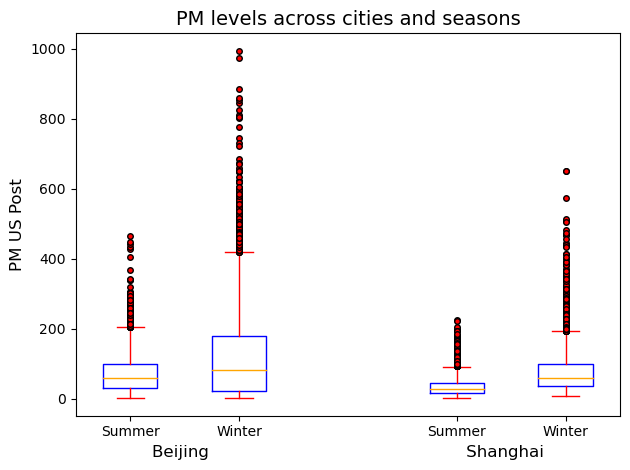

In [4]:
'''
# 4 separate boxplots w/ different scales => not good for comparing

#Create subplots
fig, axs = plt.subplots(2,2, figsize = (10,10))

#Beijing Summer
axs[0][0].boxplot(SUMMER_MATRIX_BEIJING)
axs[0][0].set_title("Beijing, Summer")
axs[0][0].set_xlabel("Data")
axs[0][0].set_ylabel("PM US Post")

#Beijing Winter
axs[0][1].boxplot(WINTER_MATRIX_BEIJING)
axs[0][1].set_title("Beijing, Winter")
axs[0][1].set_xlabel("Data")
axs[0][1].set_ylabel("PM US Post")

#Shanghai Summer
axs[1][0].boxplot(SUMMER_MATRIX_SHANGHAI)
axs[1][0].set_title("Shanghai, Summer")
axs[1][0].set_xlabel("Data")
axs[1][0].set_ylabel("PM US Post")

#Shanghai Winter
axs[1][1].boxplot(WINTER_MATRIX_SHANGHAI)
axs[1][1].set_title("Shanghai, Winter")
axs[1][1].set_xlabel("Data")
axs[1][1].set_ylabel("PM US Post")

plt.tight_layout()
plt.show()
'''

# 4 datasets on the same scale, easier to compare :)

#Create dataset
Dataset = [SUMMER_MATRIX_BEIJING, WINTER_MATRIX_BEIJING, SUMMER_MATRIX_SHANGHAI, WINTER_MATRIX_SHANGHAI]
#Hypothetical dataset if distribution was normal distribution!
#Dataset = [np.random.normal(smeanb, svarianceb, slengthb), np.random.normal(wmeanb, wvarianceb, wlengthb), np.random.normal(smeans, svariances, slengths), np.random.normal(wmeans, wvariances, wlengths)]

#Plot boxplot
#plt.boxplot(Dataset, positions=[1,2,4,5], labels=["Beijing, Summer", "Beijing, Winter", "Shanghai, Summer", "Shanghai, Winter"], boxprops=dict(color="blue"), whiskerprops=dict(color="red"), capprops=dict(color="red"), medianprops=dict(color="orange"), flierprops=dict(markerfacecolor="red",marker="o", markersize=4))
plt.boxplot(Dataset, positions=[1,2,4,5], labels=["Summer", "Winter", "Summer", "Winter"], boxprops=dict(color="blue"), whiskerprops=dict(color="red"), capprops=dict(color="red"), medianprops=dict(color="orange"), flierprops=dict(markerfacecolor="red",marker="o", markersize=4))

plt.title("PM levels across cities and seasons", fontsize = 14)
#plt.xlabel("Datasets", fontsize = 12)
plt.xlabel("Beijing                                                 Shanghai", fontsize = 12)
plt.ylabel("PM US Post", fontsize = 12)
plt.tight_layout()
plt.show()

#Remark: red dots w/ black highlights are only the outliers! (this is NOT a swarmplot!)

#tutoriel utilisation boxplot: datacamp.com/tutorial/python-boxplots

Comments here:

The PM2.5 mean values recorded in Shanghai and Beijing during the summer are respectively 6.5 and 14 times higher than the recommended WHO's guideline value, which is at only 5µg/m^3.The situation becomes even worse during the winter, when the PM levels surpass 15 and 24 times the maximum recommended PM levels. Here, the WHO's recommended value lies between the 10th percentile and the 1st quartile of the data.

Sources:  
- World Health Organization. WHO Air Quality Guidelines, September 2021, https://tinyurl.com/55yzazum  
- Sciensano. Determinants of Health: Air quality, Health Status Report, 25 Mar 2024, Brussels, Belgium, https://www.healthybelgium.be/en/health-status/determinants-of-health/air-quality 

## 2. Fit of distributions 


------------------------------------------------------------------------------------------------------

2.1. Fit a Gamma distribution to PM2.5 emissions in Beijing and Shanghai (winter & summer). Warning, in python, the Gamma distribution has a parameter of location which translate the distribution from $[0,+\infty)$ to $[loc,+\infty)$. Force its value to zero during the calibration (option floc=0) to consider only positive values.

a) Estimate Gamma parameters by log-likelihood maximization (MLE). Present them in a clean table **AND** calculate the log-likelihood.  

------------------------------------------------------------------------------------------------------

In [5]:
# Code here 
a_wmb,z, b_wmb = gamma.fit(WINTER_MATRIX_BEIJING, floc = 0)
a_smb,z, b_smb = gamma.fit(SUMMER_MATRIX_BEIJING, floc = 0)
a_wms,z, b_wms = gamma.fit(WINTER_MATRIX_SHANGHAI, floc = 0)
a_sms,z, b_sms = gamma.fit(SUMMER_MATRIX_SHANGHAI, floc = 0)

list_parameters = [[a_wmb, b_wmb], [a_smb, b_smb], [a_wms, b_wms], [a_sms, b_sms]]

pdf_wmb = gamma.pdf(WINTER_MATRIX_BEIJING, a_wmb, loc = 0, scale = b_wmb)
pdf_smb = gamma.pdf(SUMMER_MATRIX_BEIJING, a_smb, loc = 0, scale = b_smb)
pdf_wms = gamma.pdf(WINTER_MATRIX_SHANGHAI, a_wms, loc = 0, scale = b_wms)
pdf_sms = gamma.pdf(SUMMER_MATRIX_BEIJING, a_sms, loc = 0, scale = b_sms)

MLE_wmb = np.sum(gamma.logpdf(WINTER_MATRIX_BEIJING, a_wmb, loc = 0, scale = b_wmb))
MLE_smb = np.sum(gamma.logpdf(SUMMER_MATRIX_BEIJING, a_smb, loc = 0, scale = b_smb))
MLE_wms = np.sum(gamma.logpdf(WINTER_MATRIX_SHANGHAI, a_wms, loc = 0, scale = b_wms))
MLE_sms = np.sum(gamma.logpdf(SUMMER_MATRIX_BEIJING, a_sms, loc = 0, scale = b_sms))


## Table                    

Values of the parameters and the log-likehood rounded to the 4th digit:

| City, Season    | Shape parameter | Scale parameter  | log-likehood value |
| --------------- | --------------- | ---------------- | ------------------ |
| Beijing  Summer | 1.701           | 42.24            | -43175             |
| Beijing  Winter | 0.9399          | 130.2            | -48091             |
| Shanghai Summer | 1.759           | 19.27            | -48556             |
| Shanghai Winter | 2.250           | 33.90            | -42926             |

b) Plot the 4 histograms of PM2.5 and add the fitted gamma pdf’s on the same plot. What is your overall feeling about the quality of estimation?

Gamma PDF Pékin Hiver: min=1.4627244577175433e-06, max=inf


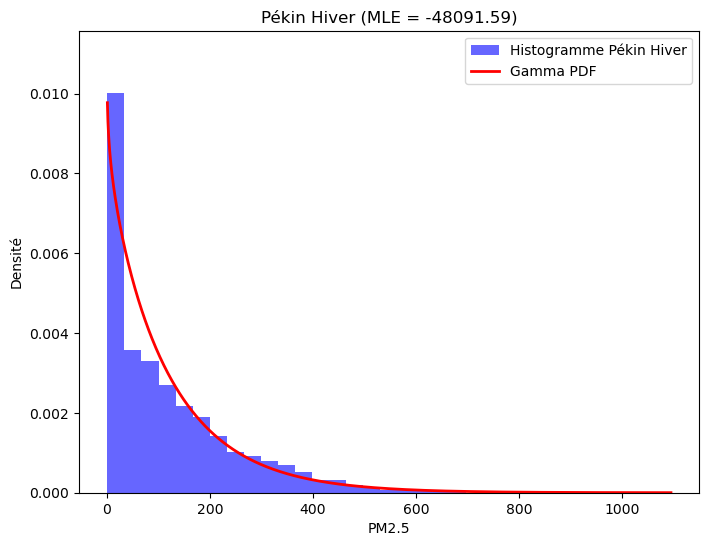

Gamma PDF Pékin Été: min=0.0, max=0.010075192488283414


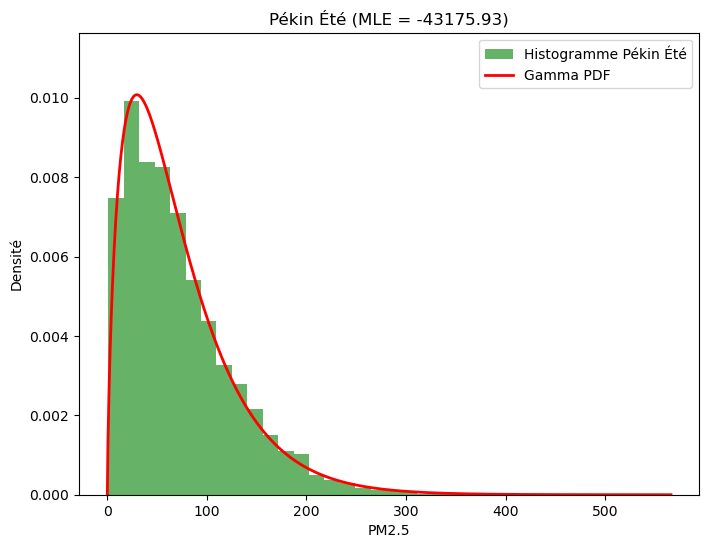

Gamma PDF Shanghai Hiver: min=0.0, max=0.009859648172837908


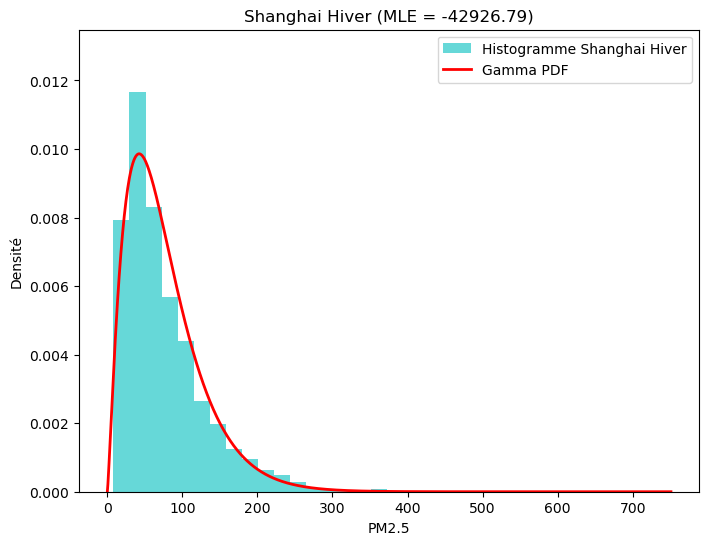

Gamma PDF Shanghai Été: min=0.0, max=0.021395110752073607


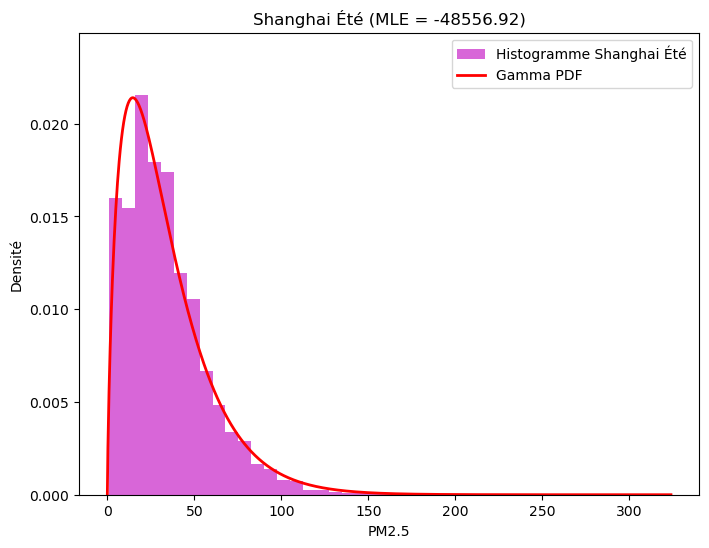

In [6]:
def plot_histogram_and_pdf(data, a, b, title, color, mle):
    plt.figure(figsize=(8, 6))
    plt.hist(data, bins=30, density=True, alpha=0.6, color=color, label=f'Histogramme {title}')

    x = np.linspace(0, np.max(data) + 100, 1000)
    gamma_pdf = gamma.pdf(x, a, loc=0, scale=b)

    print(f"Gamma PDF {title}: min={np.min(gamma_pdf)}, max={np.max(gamma_pdf)}")

    plt.plot(x, gamma_pdf, 'r-', lw=2, label='Gamma PDF')
    plt.title(f'{title} (MLE = {mle:.2f})')
    plt.legend()
    plt.xlabel('PM2.5')
    plt.ylabel('Densité')
    plt.ylim(0, plt.ylim()[1] * 1.1) 
    plt.show()

plot_histogram_and_pdf(WINTER_MATRIX_BEIJING, a_wmb, b_wmb, 'Pékin Hiver', 'b', MLE_wmb)
plot_histogram_and_pdf(SUMMER_MATRIX_BEIJING, a_smb, b_smb, 'Pékin Été', 'g', MLE_smb)
plot_histogram_and_pdf(WINTER_MATRIX_SHANGHAI, a_wms, b_wms, 'Shanghai Hiver', 'c', MLE_wms)
plot_histogram_and_pdf(SUMMER_MATRIX_SHANGHAI, a_sms, b_sms, 'Shanghai Été', 'm', MLE_sms)

Comments here:


------------------------------------------------------------------------------------------------------

2.2. You have fitted 4 gamma random variables to PM2.5 emissions in Shanghai, Beijing during summer and winter.

* Present the anatytical formulas of the mean and standard deviation of a gamma distribution. Calculate the expected levels and the standard devations of the PM2.5 emissions (in Shanghai, Beijing during summer and winter) relying on the fitted gamma random variables. 
* Calculate the 25%, 50% and 75% percentiles of these gamma distributions.
* Compare your results with the empirical statistics previously computed. Please comment your results.

------------------------------------------------------------------------------------------------------

In [7]:
# Code here
# Moyenne pouvant aussi simplement être calculée comme a_wmb * b_wmb étant donné que a_&m& = moyenne**2 / variance et b_&m& = variance / moyenne

# La variance peut également être calculée simplement telle que variance_&& = a_&m&**(1/2) * b_&m&
mean_wb = gamma.mean (a_wmb, 0, b_wmb)
moyenne_wb = a_wmb * b_wmb
std_wb = gamma.std(a_wmb, 0, b_wmb)
déviation_standard_wb = (a_wmb**(1/2)) * b_wmb

mean_sb = gamma.mean (a_smb, 0, b_smb)
std_sb = gamma.std(a_smb, 0, b_smb)


mean_ws = gamma.mean (a_wms, 0, b_wms)
std_ws = gamma.std(a_wms, 0, b_wms)

mean_ss = gamma.mean (a_sms, 0, b_sms)
std_ss = gamma.std (a_sms, 0, b_sms)

# print(mean_wb,moyenne_wb)
# print(std_wb,déviation_standard_wb )

#percentiles of beijing in winter
q1_wmb= gamma.ppf(0.25,a_wmb,scale=b_wmb)
q2_wmb= gamma.ppf(0.5,a_wmb,scale=b_wmb)
q3_wmb = gamma.ppf(0.75,a_wmb,scale=b_wmb)

#percentiles of beijing in summer
q1_smb= gamma.ppf(0.25,a_smb,scale=b_smb)
q2_smb= gamma.ppf(0.5,a_smb,scale=b_smb)
q3_smb = gamma.ppf(0.75,a_smb,scale=b_smb)

#percentiles of shangaï in winter
q1_wms= gamma.ppf(0.25,a_wms,scale=b_wms)
q2_wms= gamma.ppf(0.5,a_wms,scale=b_wms)
q3_wms = gamma.ppf(0.75,a_wms,scale=b_wms)

#percentiles of shangaï in summer
q1_sms= gamma.ppf(0.25,a_sms,scale=b_sms)
q2_sms= gamma.ppf(0.5,a_sms,scale=b_sms)
q3_sms = gamma.ppf(0.75,a_sms,scale=b_sms)

# analyical expressions of mean and std deviaton vs expected ones
print(mean_wb,moyenne_wb)
print(std_wb,déviation_standard_wb )

#comparison between percentiles observed vs percentiles of the fitted distribution

print("For Beijing in Winter :")

print("the 25% percentile of the fitted distribution is ",q1_wmb," and the calculated 25% percentile is ",wq25b)
print("the 50% percentile of the fitted distribution is ",q2_wmb," and the calculated 50% percentile is ",wmedianb)
print("the 75% percentile of the fitted distribution is ",q3_wmb," and the calculated 75% percentile is ",wq75b)

print("For Beijing in Summer :")

print("the 25% percentile of the fitted distribution is ",q1_smb," and the calculated 25% percentile is ",sq25b)
print("the 50% percentile of the fitted distribution is ",q2_smb," and the calculated 50% percentile is ",smedianb)
print("the 75% percentile of the fitted distribution is ",q3_smb," and the calculated 75% percentile is ",sq75b)

print("For Shangaï in Winter :")

print("the 25% percentile of the fitted distribution is ",q1_wms," and the calculated 25% percentile is ",wq25s)
print("the 50% percentile of the fitted distribution is ",q2_wms," and the calculated 50% percentile is ",wmedians)
print("the 75% percentile of the fitted distribution is ",q3_wms," and the calculated 75% percentile is ",wq75s)

print("For Shangaï in Summer :")

print("the 25% percentile of the fitted distribution is ",q1_sms," and the calculated 25% percentile is ",sq25s)
print("the 50% percentile of the fitted distribution is ",q2_sms," and the calculated 50% percentile is ",smedians)
print("the 75% percentile of the fitted distribution is ",q3_sms," and the calculated 75% percentile is ",sq75s)


122.40492575153928 122.40492575153928
126.25998946646783 126.25998946646783
122.40492575153928 122.40492575153928
126.25998946646783 126.25998946646783
For Beijing in Winter :
the 25% percentile of the fitted distribution is  32.99185815321611  and the calculated 25% percentile is  21.0
the 50% percentile of the fitted distribution is  82.70976626170345  and the calculated 50% percentile is  82.0
the 75% percentile of the fitted distribution is  169.69882415683497  and the calculated 75% percentile is  180.0
For Beijing in Summer :
the 25% percentile of the fitted distribution is  31.494866041648613  and the calculated 25% percentile is  30.0
the 50% percentile of the fitted distribution is  58.356071895348684  and the calculated 50% percentile is  59.0
the 75% percentile of the fitted distribution is  97.7124232976806  and the calculated 75% percentile is  100.0
For Shangaï in Winter :
the 25% percentile of the fitted distribution is  38.8891974382154  and the calculated 25% percentil

Comments here:

The analytical expression of the mean is the product of the two parametres of the fitted gamma distribution (the shape and the scale).For the datas of Beijing during winter, the mean would be : "a_wmb * b_wmb"
The analytical expression of the standard deviation is the product of the square root of the shape parametre and the scale parametre. For the datas of Beijing during winter, the standard deviation would be : "a_wmb^(0.5) * b_wmb"

Overall, the percentiles found with the fitted distribution correspond with the empirical ones

------------------------------------------------------------------------------------------------------

2.3. The quality of the MLE estimators depends upon many factors. One way to estimate it is to bootstrap the dataset. We will focus here exclusively on PM2.5 emissions in Beijing, during the winter time.

* Bootstrap 1000 times a sample of 6000 daily emissions for Beijing (winter) and plot an histogram of estimated alpha and scale parameters.

* Compute a 5% confidence interval for parameter(s) estimates for the best distribution obtained by MLE. 

* How do you interpret the results? Is the accuracy good?

------------------------------------------------------------------------------------------------------

the MLE if we fit a gamma distribution for alpha is  -662012.6172854885
the MLE if we fit a normal distribution for alpha is  3081.366063003481
the MLE if we fit a student distribution for alpha is  -1381.2097089593349
the MLE if we fit a gamma distribution for scale is  -102156204851.42412
the MLE if we fit a normal distribution for scale is  -2228.3588874463103
the MLE if we fit  a student distribution for scale is  -5517906.769149728
The 5 percents confidence interval for alpha is (0.9397003861089506, 0.9832335902790164)
The 5 percents confidence interval for scale is  (123.43933008107246, 132.24586132174895)


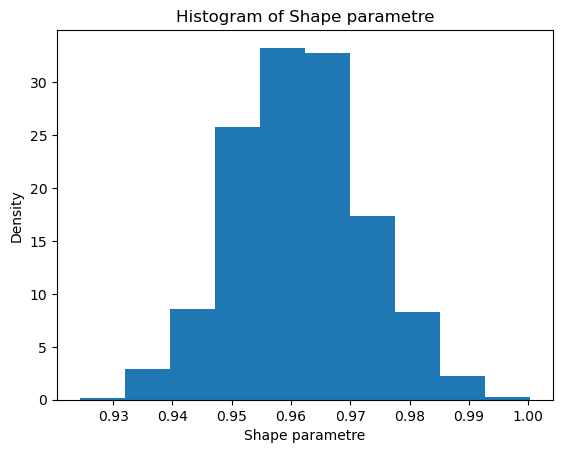

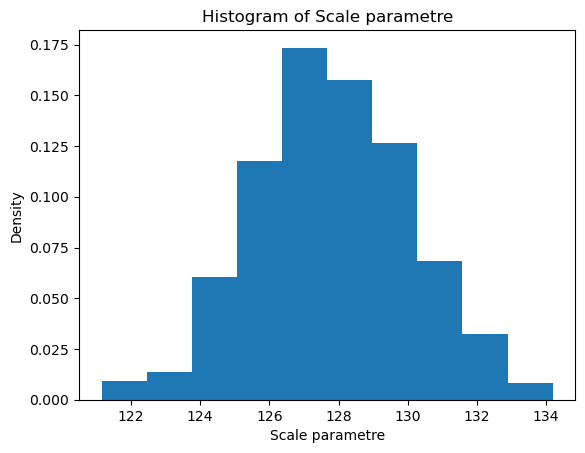

In [8]:


# Code here

# # Code here
winter_beijing_boostrap = np.array(WINTER_MATRIX_BEIJING[0:6000])
# winter_beijing_boostrap=(winter_beijing_boostrap,)
# print(gamma.b)
# #gamma.
# response1 = BootstrapMethod(winter_beijing_boostrap,gamma.std,n_resamples=1000,method='percentile',confidence_level=0.05)
# response2=BootstrapMethod(winter_beijing_boostrap,gamma.mean,n_resamples=1000,method='percentile',confidence_level=0.05)
# #result=response.bootstrap_distribution
# #print(result)
# print(response1.bootstrap_distribution)
estimate_1=[]
estimate_2 = []

def plot_hist(a,x,y,title):
    plt.figure()
    plt.hist(a,density=True)
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)

for i in range(1000):
    index = np.random.randint(0, len(winter_beijing_boostrap),len(winter_beijing_boostrap))
    re_sample = winter_beijing_boostrap[index]
    shape,z,scale=gamma.fit(re_sample,floc=0)
    estimate_1.append(shape)
    estimate_2.append(scale)

    
plot_hist(estimate_1,"Shape parametre","Density","Histogram of Shape parametre")
plot_hist(estimate_2,"Scale parametre","Density","Histogram of Scale parametre")


param1_norm_1,param2_norm_1 = norm.fit(estimate_1)
param1_t_1 = t.fit(estimate_1)
param1_gamma_1,nothing,param2_gamma_1 = gamma.fit(estimate_1)

MLE_norm_1 = np.sum(norm.logpdf(estimate_1,param1_norm_1,param2_norm_1))
MLE_t_1= np.sum(t.logpdf(estimate_1,df=param1_t_1[0]))
MLE_gamma_1 = np.sum(gamma.logpdf(estimate_1,param1_gamma_1,loc=0,scale=param2_gamma_1))



param1_norm_2,param2_norm_2=norm.fit(estimate_2)
param1_gamma_2,nothing,param2_gamma_2=gamma.fit(estimate_2)
param1_t_2 = t.fit(estimate_2)

MLE_norm_2 = np.sum(norm.logpdf(estimate_2,param1_norm_2,param2_norm_2))
MLE_gamma_2 = np.sum(gamma.logpdf(estimate_2,param1_gamma_2,loc=0,scale=param2_gamma_2))
MLE_t_2 = np.sum(t.logpdf(estimate_2,df=param1_t_2[0]))

conf_interval_shape_norm=norm.interval(0.95,param1_norm_1,param2_norm_1)
conf_interval_scale_norm=norm.interval(0.95,param1_norm_2,param2_norm_2)






print("the MLE if we fit a gamma distribution for alpha is ",MLE_gamma_1)
print("the MLE if we fit a normal distribution for alpha is ",MLE_norm_1)
print("the MLE if we fit a student distribution for alpha is ",MLE_t_1)

print("the MLE if we fit a gamma distribution for scale is ",MLE_gamma_2)
print("the MLE if we fit a normal distribution for scale is ",MLE_norm_2)
print("the MLE if we fit  a student distribution for scale is ",MLE_t_2)



lower= np.quantile(estimate_1,0.025)
upper=np.quantile(estimate_1,0.975)

lower2=np.quantile(estimate_2,0.025)
upper2=np.quantile(estimate_2,0.975)

interval_quantilemethod_shape=[lower,upper]
interval_quantilemethod_scale=[lower2,upper2]

print("The 5 percents confidence interval for alpha is",conf_interval_shape_norm)
print("The 5 percents confidence interval for scale is ",conf_interval_scale_norm,)


Comments here:

if we try to fit a distribution for the parametres estimates among the normal,gamma and student distribution, the one which has the highest MLE is the normal distribution ( for both parametres) . The 5% confidence interval we compute with the normal distribution is the same as the one we find when we use the "quantile" method from numpy to get the two extreme values of the confidence interval.

Overall, both confidence intervals are quite small which mean that the variances of the 2 estimators are small and that the 2 original values of the estimators we had were very likely to be closed to the real values of the parametres.


## 3. Regression and forecasting 

------------------------------------------------------------------------------------------------------

3.1. In this question, you will determine if PM2.5 emissions levels depends upon weather conditions. We focus
on emissions measured by the US embassy in Beijing, during winter.

Regress PM2.5 emissions in Beijing (season 4) with respect to:
 * DEWP: Dew Point (Celsius Degree)
 * TEMP: Temperature (Celsius Degree)
 * HUMI: Humidity (%)
 * PRES: Pressure (hPa)
 * cbwd: Combined wind direction
 * Iws: Cumulated wind speed (m/s)
 * precipitation: hourly precipitation (mm)

The variable 'cbwd' is categorical. Convert it into dummy variables (0 or 1) with panda.get_dummies. Do not forget to drop one modality of this variable. Remove lines from the dataset with NaN entries.

* Use the OLS() function of the package statsmodels.api to perform the linear regression. 
* Comment your results (goodness of fit, R2, F-stat and T-stats of coefficients)
* Answer this : Does high hourly precipitation (mm) mitigate PM2.5 emissions?

------------------------------------------------------------------------------------------------------

In [9]:
def Data_preparation(données_initiales):
    #We keep the lines for winter
    df4 = données_initiales.drop(données_initiales[données_initiales['season'] == 3].index)
    df4 = df4.drop(df4[df4['season'] == 2].index)
    df4 = df4.drop(df4[df4['season'] == 1].index)

    #We keep the lines with the data that we want to use for the regression
    data = df4.drop(df4.columns[[0, 2, 3, 4, 5, 6, 7, 8, 17]], axis=1)

    #We delete the lines with no PM measured
    data = data.dropna(axis=0)

    Year = data.iloc[:, 0]
    data = data.drop(data.columns[0], axis=1)

    #We create a vector with the PM
    Y = data.iloc[:, 0]
    n = len(Y)

    #We create a matrix with the variables that we need to study
    data = data = data.drop(data.columns[0], axis=1)
    data = pd.get_dummies(data, columns=[data.columns[4]], drop_first=True, dtype=int)

    return Y, data, Year, len(Y)

Y, data, Year, len_y = Data_preparation(df1)


def Regression(data, Y):
    """
    inputs:
    data: numpy array de longueur 7*n contenat les données
    Y: numpy array de longueur 7*1 contenant les valeurs de PM2.5
    n : nombre de données pour chaque variable
    
    return:
    Y numpy array contenant la meilleure aproximation de y en régression linéaire
    data_cst : tableau numpy étant la matrice data + la constante
    Results.summary() : résultats de la régression (R², p-values pour chaque coefficient, Tstat, Fstat)
    beta_array : array numpy contenant les valeurs des betas
    
    """
    data = sm.add_constant(data)
    Results = sm.OLS(Y, data).fit()
    beta_array = Results.params
    Y_estimator = Results.predict(data)
    return (Results.summary(), Y_estimator, data, beta_array)

summary, Y_estimator, data_cst, Beta = Regression(data, Y)
print(summary)


                            OLS Regression Results                            
Dep. Variable:             PM_US Post   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     1245.
Date:                Fri, 01 Nov 2024   Prob (F-statistic):               0.00
Time:                        15:01:34   Log-Likelihood:                -73083.
No. Observations:               12418   AIC:                         1.462e+05
Df Residuals:                   12408   BIC:                         1.463e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2441.7186    144.242     16.928

Comments here:  
The value of $R^2$ is 0.474 and mean that 47.4% of the PM2.5 concentration's variance can be explained by the factors we have studied and so our goodness of fit is not really relevant.
We can also see that only dew point and combined wind coming from the North West have low T-stat, which mean that they do not have a significant relationship with the PM2.5 concentration. Unlike the other factors that have a strong link with it.
The F-stat has a high value and so we can not reject the hypothesis that the concentration of PM2.5 are not linked to the factors studied. This corroborate our previous assumptions that many factors we studied have a link to the PM2.5 concentration.

------------------------------------------------------------------------------------------------------

3.2. We design a simple auto-regressive model for predicting the PM 2.5 emissions over the next hour, in Beijing, measured at the US embassy (warning, we consider emissions between the 1/1/2012 and 31/12/2015 and during all seasons).

Let us denote by E(t) the emission at time 't'. We an autoregressive model defined as follows:

$$E(t) = \sum_{k=1}^{3} a_k E(t-k) $$

a. We split the dataset into a training set (the first 75% of data included) and a validation set (the remaining 25%).

b.	Estimate this model with statsmodels on the training set. 

c.	Analyze statistics reported by statsmodel.

------------------------------------------------------------------------------------------------------

In [10]:

def Auto_regression_data_preparation(données_initiales):
    #We delete the years that we dont need
    df3 = données_initiales.drop(données_initiales[données_initiales['year'] == 2010].index)
    df3 = df3.drop(df3[df3['year'] == 2011].index)
    
    #We create a vector with the PM measured
    Data_auto_regressive = df3.iloc[:, 9]
    Data_auto_regressive = Data_auto_regressive.dropna(axis=0)

    #We create a vector with the first 75% of data to train our model
    n1 = int(len(Data_auto_regressive)*3//4)
    Y_auto_training = Data_auto_regressive.head(n1).to_numpy()

    #We create a matrix that will be used to make the regression and determinate the coefficients for the autoregression
    Y_Matrix = np.ones((3, n1-3))
    Y_Matrix[2] = np.delete(Y_auto_training, [n1-3, n1-1, n1-2] , axis=0)
    Y_Matrix[1] = np.delete(Y_auto_training, [n1-2, n1-1, 0] , axis=0)
    Y_Matrix[0] = np.delete(Y_auto_training, [n1-1, 1, 0] , axis=0)
    Y_Matrix = Y_Matrix.T

    #We delete the 3 first value of PM that cannot be obtained with an autoregression
    Y_auto_training = np.delete(Y_auto_training, [0, 1, 2] , axis=0)

    return Y_auto_training, Y_Matrix, Data_auto_regressive, n1

Y_auto_training, Y_Matrix, Data_auto_regressive, n1 = Auto_regression_data_preparation(df1)


def MAE_func(array_error):
    sum =0
    for err in array_error:
        sum += err
    return sum/len(array_error)

def Auto_Regression_training(Y_Matrix, Y_auto_training):
    Results_auto_reg = sm.OLS(Y_auto_training, Y_Matrix).fit()
    beta_array_auto_reg = Results_auto_reg.params
    Y_estimator_auto_reg = Results_auto_reg.predict(Y_Matrix)
    return Results_auto_reg, beta_array_auto_reg, Y_estimator_auto_reg

Results_auto_reg, beta_array_auto_reg, Y_estimator_auto_reg = Auto_Regression_training(Y_Matrix, Y_auto_training)

print(Results_auto_reg.summary())

error_training = abs(Y_auto_training - Y_estimator_auto_reg)
MAE_training = MAE_func(error_training)
print(MAE_training)

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.970
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                          2.758e+05
Date:                Fri, 01 Nov 2024   Prob (F-statistic):                        0.00
Time:                        15:01:34   Log-Likelihood:                     -1.1715e+05
No. Observations:               25694   AIC:                                  2.343e+05
Df Residuals:                   25691   BIC:                                  2.343e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Comments here:
The R² is near 1 which means that our model can predict most of the values of the PM2.5 very well.
The values of the t stat for each coefficient is high which means the PM values have a strong linear dependentie with the previous PM values.
The pvalue is zero for each coefficient which means that the previous value of the PM can explain the value of PM at the time t well. If the pvalue is less than 5%, we can reject the Hypothesis than the coefficient studied is equal to zero which means that it has a non-negligible impact on the PM2.5 values.
The F-statisitc has a great value (2.758e+05) which means that the coefficent together explain the evolution of PM2.5 very well.

------------------------------------------------------------------------------------------------------

3.3. Use this model on the test set to forecast the PM2.5 hourly emissions on the test set.

a. Compare on a graph, the forecast to real emissions.

b. Plot the errors of prediction. Are they acceptable? Compute the mean absolute error (MAE) of prediction on the training and test sets.
 
------------------------------------------------------------------------------------------------------

Mean of PM2.5 : 82.71725426103211
MAE of predictions : 10.530541897684015


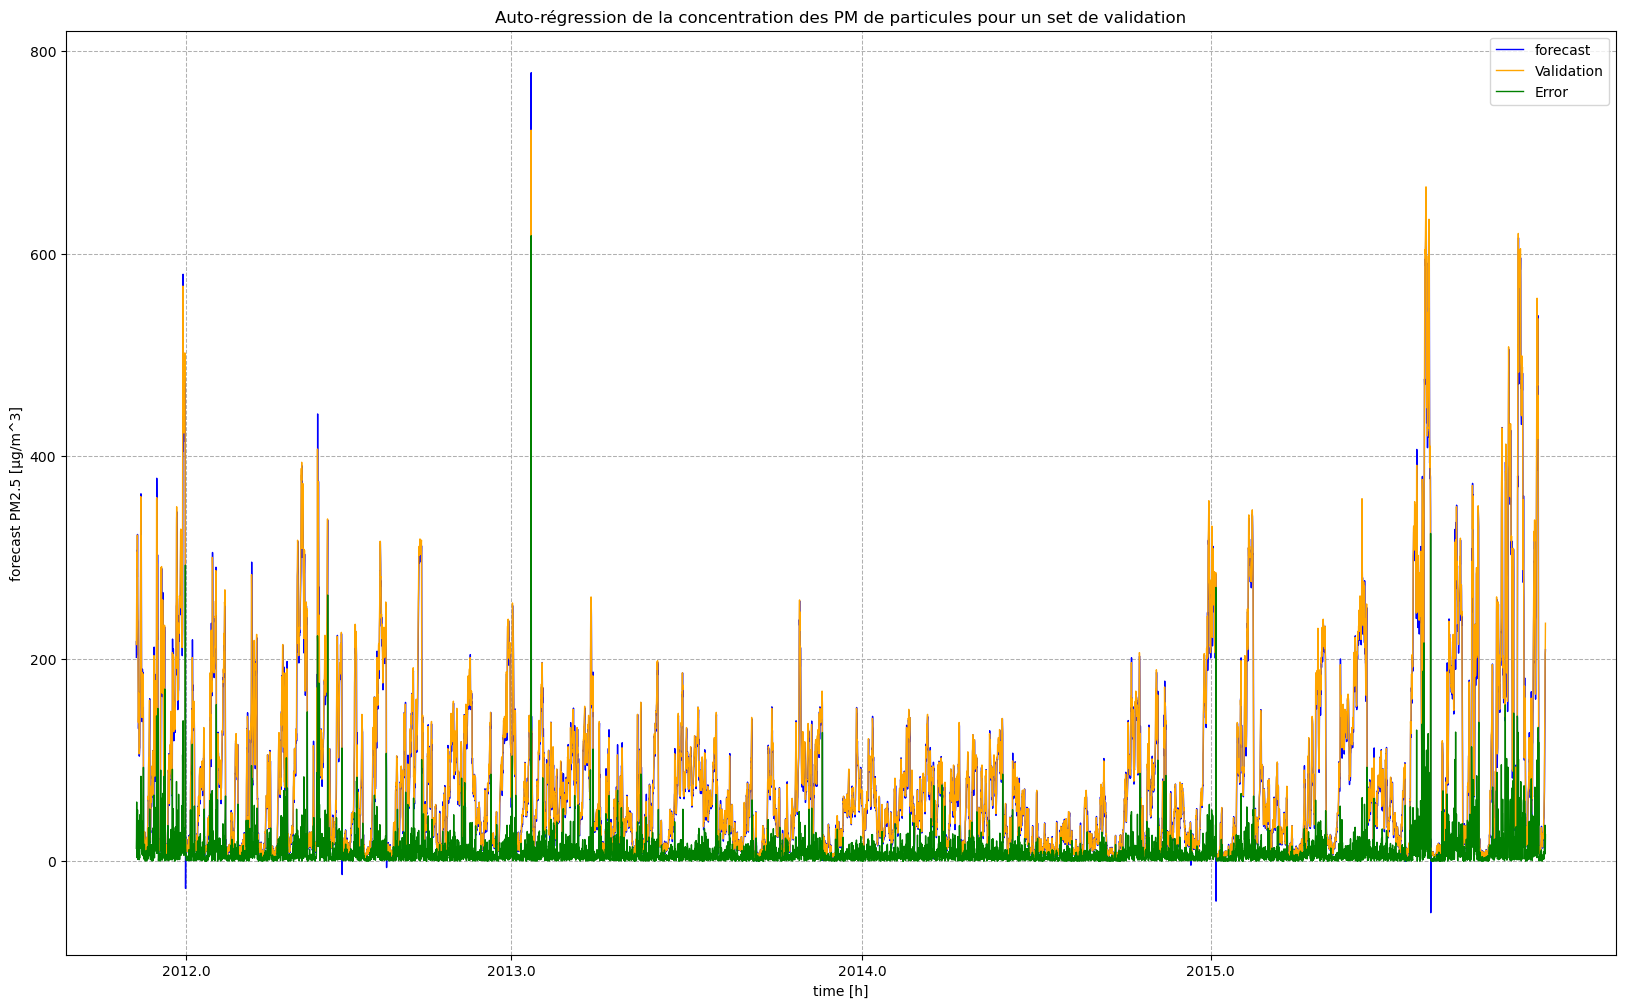

In [11]:
def Validation_Auto_regression_data_preparation(Data_auto_regressive, n1, Y_auto_training):
    #We create an vector with the PM for the validation
    Y_auto_validation = Data_auto_regressive.tail(len(Data_auto_regressive)-n1).to_numpy()
    n2 = len(Y_auto_validation)

    #We create the Matrix to make the regression
    Y_Matrix_Validation = np.ones((3, n2-3))    
    Y_Matrix_Validation_2 = np.ones((3, 3))     #Y_Matrix_Validation_2 contained the last values of the training set to calculate the 3 first value of the validation set

    Y_Matrix_Validation_2[0] = Y_auto_training[-3:]
    Y_Matrix_Validation_2[-2:, 1] = Y_auto_training[-2:]
    Y_Matrix_Validation_2[-1][2] = Y_auto_training[-1]
    Y_Matrix_Validation_2[0][1] = Y_auto_validation[0]
    Y_Matrix_Validation_2[:2, 2] = Y_auto_validation[:2]

    Y_Matrix_Validation[2] = np.delete(Y_auto_validation, [n2-3, n2-1, n2-2] , axis=0)
    Y_Matrix_Validation[1] = np.delete(Y_auto_validation, [n2-2, n2-1, 0] , axis=0)
    Y_Matrix_Validation[0] = np.delete(Y_auto_validation, [n2-1, 1, 0] , axis=0)


    Y_Matrix_validation_final = np.concatenate((Y_Matrix_Validation_2, Y_Matrix_Validation), axis=1)
    Y_Matrix_Validation_final = Y_Matrix_validation_final.T

    return Y_Matrix_Validation_final, Y_auto_validation, n2

Y_Matrix_Validation_final, Y_auto_validation, n2 = Validation_Auto_regression_data_preparation(Data_auto_regressive, n1, Y_auto_training)


Year_val = Year.tail(len(Data_auto_regressive)-n1).to_numpy()

def ind_year(Years):
    indices = np.array([])
    années = np.array([])
    for i in range(1, len(Years)):
        if Years[i]!= Years[i-1]:
            indices = np.append(indices, i)
            années = np.append(années, Years[i])
    return indices, années


def Auto_Regression_training(Y_Matrix_Validation_final, Y_auto_validation):

    forecast = Results_auto_reg.predict(Y_Matrix_Validation_final)
    error = abs(Y_auto_validation - forecast)
    return forecast, error

forecast, error = Auto_Regression_training(Y_Matrix_Validation_final, Y_auto_validation)

mean_PM = 0
for i in Y_auto_validation:
    mean_PM += i/len(Y_auto_validation)

print('Mean of PM2.5 : '+str(mean_PM))

MAE = MAE_func(error)
print('MAE of predictions : '+ str(MAE))


time = np.linspace(0, len(Y_auto_validation), len(Y_auto_validation))
plt.figure(figsize=(20, 12))
plt.grid(linestyle='--', linewidth=0.75)
plt.plot(time, forecast, color = 'blue', linewidth=1, label='forecast')
plt.plot(time, Y_auto_validation, linewidth=1, color = 'orange', label='Validation')
plt.plot(time, error, color = 'green', linewidth=1, label='Error')
plt.title('Auto-régression de la concentration des PM de particules pour un set de validation')
plt.legend()
plt.xlabel('time [h]')
plt.ylabel('forecast PM2.5 [\u03BCg/m^3]')
plt.xticks(ind_year(Year_val)[0], ind_year(Year_val)[1])
plt.show()


Comments here:
As we can see the plot of the errors of prediction, our predictions fit the real datas very well.
The MAE of the validation set has a small value (10.53) compared to the mean of the values of the PM2.5 (82.71). Then, we can say our errors are acceptable.
We can have the same conclusion about the MAE for the training set.


## 4. Hypothesis tests

------------------------------------------------------------------------------------------------------
4.1. You will compare the average PM2.5 emissions measured at the US embassy in Beijing (PM_US Post_y), during winter with emissions reported by Chinese authorities in Nongzhanguan (PM_Nongzhanguan), a district of Beijing close to the US embassy.

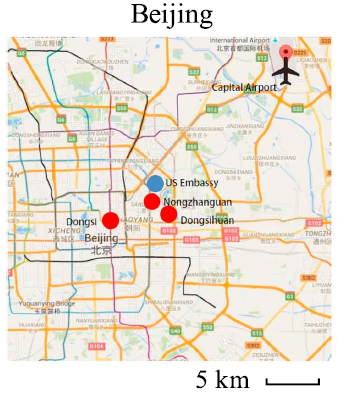


a) Reload the data from 'BeijingPM.csv' file. Keep data from the 1/1/2012 and 31/12/2015 in winter time(season 4). Take care to remove missing data (NA) and keep only days for which PM2.5 emissions are available **both** in Nongzhanguan (PM_Nongzhanguan) and Beijing (PM_US Post), to keep the same number of observations.

------------------------------------------------------------------------------------------------------

In [12]:
Bejing_Winter_question4 = []
Nongzhanguan_Winter_question4 = []

with open('BeijingPM.csv') as f:
    reader = csv.DictReader(f)
    data = [row for row in reader]
    for row in data[17520:]:
        if row['season'] == '4' and row['PM_US Post'] != 'NA' and row['PM_Nongzhanguan'] != 'NA':
            Bejing_Winter_question4.append(row['PM_US Post'])
            Nongzhanguan_Winter_question4.append(row['PM_Nongzhanguan'])

Bejing_Winter_question4 = [float(i) for i in Bejing_Winter_question4]
Nongzhanguan_Winter_question4 = [float(i) for i in Nongzhanguan_Winter_question4]

: 

b) Perfom a  the Stutent's T test to check if the average hourly PM2.5 emissions are the same in Nongzhanguan and at the US embassy. The null hypothesis is

$H_0$: $\mu_{US} = \mu_{Nongzhanguan}$.

Use a confidence level of 5%. Take care to comment your conclusions. Are all assumptions required to perform this test sastisfied?


In [ ]:
alpha = 0.05
S_US = np.sqrt(np.sum((Bejing_Winter_question4 - np.mean(Bejing_Winter_question4))**2)/(len(Bejing_Winter_question4)-1))
S_NZ = np.sqrt(np.sum((Nongzhanguan_Winter_question4 - np.mean(Nongzhanguan_Winter_question4))**2)/(len(Nongzhanguan_Winter_question4)-1))
S_pool = np.sqrt(((len(Bejing_Winter_question4)-1)*S_US**2 + (len(Nongzhanguan_Winter_question4)-1)*S_NZ**2)/(len(Bejing_Winter_question4)+len(Nongzhanguan_Winter_question4)-2))

t_stat = (np.mean(Bejing_Winter_question4) - np.mean(Nongzhanguan_Winter_question4))/(S_pool*np.sqrt(1/len(Bejing_Winter_question4) + 1/len(Nongzhanguan_Winter_question4)))
t_crit1 = t.ppf(alpha/2, len(Bejing_Winter_question4)+len(Nongzhanguan_Winter_question4)-2)
t_crit2 = t.ppf(1-alpha/2, len(Bejing_Winter_question4)+len(Nongzhanguan_Winter_question4)-2)
p_value = 2*(1-t.cdf(t_stat, len(Bejing_Winter_question4)+len(Nongzhanguan_Winter_question4)-2))

print ('t_stat:', t_stat)
print ('t_crit1:', t_crit1)
print ('t_crit2:', t_crit2)
print ('p_value:', p_value)
if t_stat < t_crit1 or t_stat > t_crit2:
    print("Reject H0")

if p_value < alpha:
    print("Reject H0")


t_stat: 3.661707972656801
t_crit1: -1.9601678788177468
t_crit2: 1.9601678788177463
p_value: 0.0002516497324605016
Reject H0
Reject H0


 1. CONCLUSIONS :
 - Since test statistic **t_stat is greater than 1-alpha/2** quantile, **we reject H_0**.
 - In addition, **p-value is less than alpha**,which confirms the decision to reject the hypothesis of equal means.
 2. ASSUMPTIONS USED:
 - It's a test over 2 populations within we suppose that **the 2 variances are the same**.
 - Neverthless, **we don't know that variance**.
 - We also suppose that the 2 samples are **normally distributed**.

c) Explain the Wilcoxon's test. What is the main advantage of this test compared to the Student's T test. Why is this useful in our project? 

- Wilcoxon's test tests the assumption **H0 : the 2 populations distributions are identical** against **H1 : the 2 polulations differs in location**.
- It's useful in our project because **we do not have to know the distributions**.

d) Apply the Wilcoxon's test to distributions of the hourly PM2.5 emissions in Nongzhanguan and at the US embassy. What can you conclude ?

In [ ]:
alpha = 0.05
# sort the data
Bejing_Winter_question4.sort()
Nongzhanguan_Winter_question4.sort()

# calculate the rank of the differences
differences = np.array(Bejing_Winter_question4) - np.array(Nongzhanguan_Winter_question4)

# T+ = sum of the ranks of the positive differences
# T- = sum of the ranks of the negative differences
T_plus = np.sum(differences > 0)
T_minus = np.sum(differences < 0)

n = len(Bejing_Winter_question4)
Z = (T_plus - n*(n+1)/4)/(np.sqrt(n*(n+1)*(2*n+1)/24))

z_crit1 = norm.ppf(alpha/2)

print ('Z:', Z)
print ('z_crit1:', z_crit1)

if Z > z_crit1 or Z < -z_crit1:
    print("Reject H0")


Z: -66.01999627892997
z_crit1: -1.9599639845400545
Reject H0


- **We reject H0 if Z >= z_alpha/2 or if Z <= -z_alpha/2**. This is the case, so we reject H0.
- This statistic's test (Z) comes from **"Mathematical statistics with applications" of  Wackerly, Mendenhall et Scheaffer p753**.